Name: Wenhao Wu

Student ID: 1304952

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/wenhaowu/Desktop/machine-learning/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 
                               kernel_size=(3,3),
                               input_shape=(28,28,1), 
                               activation='relu')),
#model.add(keras.layers.Conv2D(64,
                             #kernel_size=(3,3),
                             #activation='relu')),
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))),
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0 #Input normalization, rgb(255,255,255) is black
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
 
y_train = keras.utils.to_categorical(y_train) #Prepare for outputs of logical regression
y_test = keras.utils.to_categorical(y_test)

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 636us/step - loss: 0.4218 - acc: 0.8527 - val_loss: 0.3460 - val_acc: 0.8770
Epoch 2/5
60000/60000 [==============================] - 39s 652us/step - loss: 0.2840 - acc: 0.8991 - val_loss: 0.2896 - val_acc: 0.8956
Epoch 3/5
60000/60000 [==============================] - 39s 648us/step - loss: 0.2404 - acc: 0.9126 - val_loss: 0.2764 - val_acc: 0.8992
Epoch 4/5
60000/60000 [==============================] - 40s 659us/step - loss: 0.2100 - acc: 0.9224 - val_loss: 0.2630 - val_acc: 0.9052
Epoch 5/5
60000/60000 [==============================] - 42s 693us/step - loss: 0.1859 - acc: 0.9308 - val_loss: 0.2466 - val_acc: 0.9103


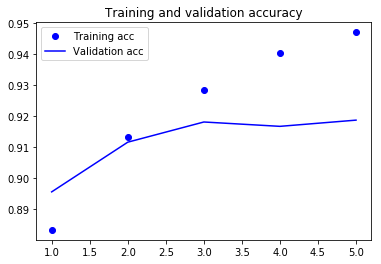

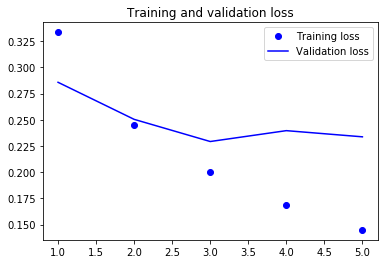

In [85]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Even a simple convolution network that trains only 5 epochs could reach the accurancy of 91%. Comapres to 85% of accurancy that we achived from Dense network, it is a big step. However, the validation loss wanders around 0.225, apperantly some improvement is needed there.